# Лабораторная работа №2: Классические методы мат. статистики
### Выполнила студентка гр. 1384 Шиняева Анастасия. Вариант №22

## Цель работы
### Научиться применять методы математической статистики для решения задач статистического анализа. Сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения
### Вариационный ряд – ранжированный в порядке возрастания ряд

### Эмпирическая функция распределения - это функция, которая определяет для каждого значения x частоту событий X<x и предназначена для оценки теоретической функции распределения генеральной совокупности.

### Гистограмма частот – это фигура, состоящая из прямоугольников, ширина которых равна длинам частичных интервалов, а высота – соответствующим плотностям частот.

### Выборочный аналог математического ожидания - выборочное среднее:
### $\overline{X} =\frac{1}{n}\sum_{i=1}^{n}x_i$

### Выборочный аналог дисперсии и СКО - выборочная дисперсия и выборочное СКО:

### $S^2 =\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\overline{X}\right)$

### $S=\sqrt{S^2}$

### Выборочный коэффициент асимметрии:
### $\widehat{\mathrm{Skew}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^3}{S^3}$

### Выборочный коэффициент эксцесса:
### $\widehat{\mathrm{Kurt}}X=\frac{1}{n}\frac{\sum \limits_{i=1}^{n}\left(x_i-\overline{X}\right)^4}{S^4}-3$

### Метод максимального правдоподобия - это метод оценивания неизвестного параметра путём максимизации функции правдоподобия $L(\overrightarrow{X},\theta)=\prod_{i=1}^{n}P_{\theta}(X_{i})$

### Метод моментов — метод оценки неизвестных параметров распределений, идея метода заключается в замене истинных соотношений выборочными аналогами.

### Асиптотический доверительный интервал:
### $\left[ \widehat{\theta}(\overrightarrow{X})-\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}};\widehat{\theta}(\overrightarrow{X})+\frac{X_{\alpha}}{\sqrt{n\cdot I\left( \widehat{\theta}(\overrightarrow{X}) \right)}} \right]$

### Статисктика Хи-квадрат:  $\chi^{2} = \sum \limits_{i=1}^{N} \frac{(n_{i} - p_{i} n)^{2}}{n p_{i}} $

### Статистика критерия Колмогорова: $D_n = sup_{x \in \mathbb{R}}|F_n(x) - F_0(x)|$

### Теорема Колмогорова: $\sqrt{n}D_n \rightarrow K, при \, основной \, гипотезе$

### Статистика отношений правдоподобия:
### $LR(\overrightarrow{X},\theta_{1},\theta_{0})=\frac{L(\overrightarrow{X},\theta_{1})}{L(\overrightarrow{X},\theta_{0})}$

### $LR(\overrightarrow{X},\theta_{1},\theta_{0}) > c=> принимаем\, основную\, гипотезу$

### $LR(\overrightarrow{X},\theta_{1},\theta_{0}) < c=> отвергаем\, основную\, гипотезу$

## Постановка задачи
### Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize as opt
import seaborn as sns

### **Задание 1**

### Загруженная выборка:

In [ ]:
dataset = np.array([0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0])
dataset

array([0, 0, 1, 0, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 1, 0])

### a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.

### a.1) Вариационный ряд

In [ ]:
variational_series = np.sort(dataset)
print(variational_series)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 2 2 2 2 2 2 2 2 2]


### a.2) Эмпирическая функция распределения

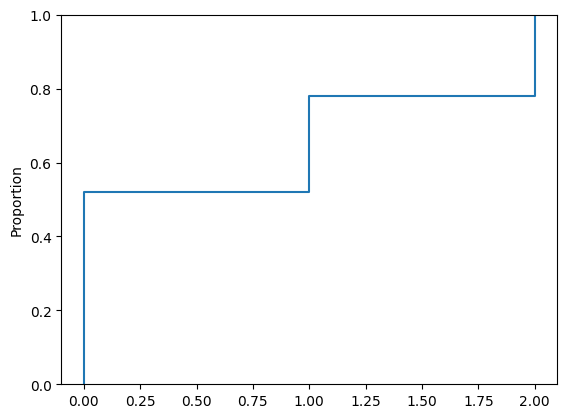

In [ ]:
ECDF = lambda dataset, x: len(dataset[dataset < x])/len(dataset)
sns.ecdfplot(data=variational_series)
None

### a.3) Гистограмма частот

In [ ]:
values, counts = np.unique(dataset, return_counts=True)
print(counts)
counts = [x/len(dataset) for x in counts]
counts

[26 13 11]


[0.52, 0.26, 0.22]

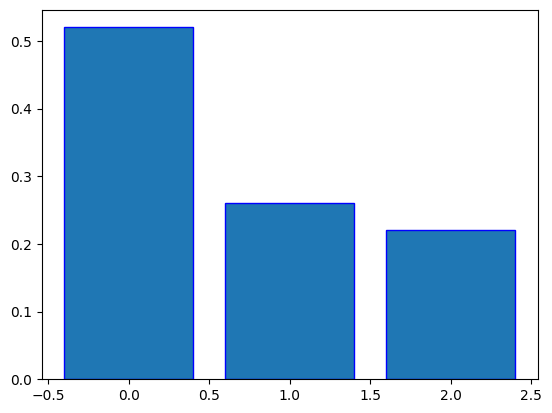

In [ ]:
plt.bar(values, counts, align='center', edgecolor='b')
None

### b) Вычислить аналоги выборочных числовых характеристик

### Mean $= \frac{1}{n}\sum_{i=1}^{n}X_i$

### Variance [unbiased] $=\frac{1}{n-1}\sum_{i=1}^{n}(X_i- \bar{X})^2$

### std $= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(X_i- \bar{X})^2}$

### Variance [biased] $=\frac{1}{n}\sum_{i=1}^{n}(X_i- \bar{X})^2$

### Empirical Probability $= EPr(X \in [a, b]) = ECDF(b) -ECDF(a)$

### Median  $\begin{cases} if \text{ n is odd}, {\displaystyle \mathrm {median} (x)=x_{(n+1)/2}} \\ if \text{ n  is even}, {\displaystyle \mathrm {median} (x)={\frac {x_{(n/2)}+x_{((n/2)+1)}}{2}}}{\displaystyle} \end{cases}$

### Skewness [Fisher-Pearson] = ${\displaystyle \frac{\frac{1}{N} \sum\limits^{N}_{n=1}(x[n]-\bar{x})^3}{(\sqrt{\frac{1}{N} \sum\limits^{N}_{n=1}(x[n]-\bar{x})^2})^3}}$

### Kurtosis = ${\displaystyle \frac{\hat \mu_4}{\hat \sigma^4}}$

In [ ]:
print("Мат. ожидание: ", np.mean(dataset))
print("СКО: ", np.std(dataset))
print("Дисперсия [biased]: ", np.std(dataset) ** 2)
print("Дисперсия [unbiased]: ", 1/(len(dataset)-1)*sum([(dataset[i] - dataset.mean())**2 for i in range(len(dataset))]))
print("Медиана: ", np.median(dataset))
print("Ассиметрия: ", stats.skew(dataset))
print("Эксцесса: ", stats.kurtosis(dataset))

Мат. ожидание:  0.7
СКО:  0.806225774829855
Дисперсия [biased]:  0.6500000000000001
Дисперсия [unbiased]:  0.6632653061224486
Медиана:  0.0
Ассиметрия:  0.5953667260282006
Эксцесса:  -1.212307692307693


### $P(X \in [0, 0.87]) = P(0 \le X \le 0.87) = \hat{F}(0.87^+) - \hat{F}(0) = \hat{F}(0.87) - \hat{F}(0) = 0.52$

### с) Посчитать оценки для лямбды, методом моментов, ОМП, найти смещение оценки

### ОМП для $\lambda$
### <center> $f(k, \lambda) = \frac{\lambda^k e^{-\lambda}}{k!}$


### <center> $L(\overrightarrow{k}, \lambda) = \prod_{i=1}^{n}\frac{\lambda^{k_i} e^{-\lambda}}{{k_i}!} = \frac{\prod_{i=1}^{n}(\lambda^{k_i} e^{-\lambda})}{\prod_{i=1}^{n}{k_i}!} = \frac{\lambda^{\sum_{i=1}^{n}k_i} e^{-\lambda n}}{\prod_{i=1}^{n}{k_i}!} $

### <center> $LL(\overrightarrow{k}, \lambda) = log(\lambda)\sum_{i=1}^{n}k_i - \lambda n - \sum_{i=1}^{n}log({k_i}!) $

### <center> $\frac{\partial LL}{\partial \lambda} = \sum_{i=1}^{n}k_i\frac{1}{\lambda} - n = 0 $


### <center>$\hat{\lambda} = \frac{\sum_{i=1}^{n}k_i}{n} = \bar{X}$

### Оценка через метод моментов для $\lambda$
### <center> 1 параметр - 1 уравнение.
### <center> $M_1 = g_1 \Rightarrow \begin{cases} M_1 = E[X] = \lambda \\ g_1 = \bar{X} \end{cases} \Rightarrow \hat{\lambda} = \bar{X}$

### Проверка на смещенность
### <center> $E[\hat{\lambda}]= E[\bar{X}] = E[\frac{\sum_{i=1}^{n}k_i}{n}] = \frac{1}{n}\sum_{i=1}^{n}E[k_i]= \frac{1}{n}\sum_{i=1}^{n} \lambda =  \frac{n \lambda}{n} = \lambda$

### <center> $bias(\hat{\lambda}, \lambda) = 0$

### d) Построить асимптотический довверительный интервал уровня значимости $\alpha_1[=0.1]$ для параметра $\lambda$ на базе ОМП

### Наша ОМП оценка:
### <center> $\hat{\lambda} = \bar{X}$
### Оценки ОМП асимптотически нормальны, что значит:
### <center> $\sqrt{n}(\hat{\lambda}-\lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, \sigma^2(\lambda))$
### В нашем случае:
### <center> $\sqrt{n}(\bar{X}-\lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, \lambda)$
### Перейдем к стандартному нормальному:
### <center> $\frac{\sqrt{n}}{\sqrt{\lambda}}(\bar{X}- \lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$
### Интервал асимптотический, значит имеем право использовать состоятельную оценку дисперсии.
### <center> $\frac{\sqrt{n}}{S}(\bar{X}- \lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$
### Значения квантилей получим из:
### <center> $z_{\alpha} : CDF(z_{\alpha}) = 1 - \frac{\alpha}{2}$
### В нашем случае:
### <center> $z_{\alpha} : CDF(z_{\alpha}) = 0.95$
### Построим доверительный интервал
### <center> $P(-z_{\alpha} \leq \frac{\sqrt{n}}{S}(\bar{X} - \lambda) \leq z_{\alpha}) = 1 - \alpha$
### Решим его относительно параметра:
### <center> $P(\bar{X} - \frac{z_{\alpha}{S}}{\sqrt{n}} \geq  \lambda \geq \bar{X} + \frac{z_{\alpha}{S}}{\sqrt{n}}) = 1 - \alpha$
### Полученный АДИ:
### <center> $[\bar{X} - \frac{z_{\alpha}{S}}{\sqrt{n}}, \bar{X} + \frac{z_{\alpha}{S}}{\sqrt{n}}]$
### Подстави чиселки:
### <center> $[0.7 - \frac{1.64 \cdot 0.65}{7.07}, 0.7 + \frac{1.64 \cdot 0.65}{7.07}]$
### Получим:
### <center> $[0.56, 0.84]$


### e) Используя гистограмму частот, построить критерий значимости $\chi^2$ проверки простой гипотезы согласия с распределением $Pois(\lambda_0)$;
### Проверить гипотезу на уровне значимости $\alpha_1$;
### Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

In [ ]:
emp_values = (([0], 0.52), ([1], 0.26), ([2, "inf"], 0.22))
emp_values

(([0], 0.52), ([1], 0.26), ([2, 'inf'], 0.22))

In [ ]:
# Теоретические значения:
x = [[0],[1],[2, "inf"]]
y = [stats.poisson.pmf(k=0,loc=0,mu=0.7), stats.poisson.pmf(k=1,loc=0,mu=0.7)]
y.append(1 - sum(y))
theor_values = tuple(zip(x,y))
theor_values[2][1] * 50
theor_values

(([0], 0.4965853037914095),
 ([1], 0.34760971265398666),
 ([2, 'inf'], 0.15580498355460382))

In [ ]:
tmp = [ (pow(emp_values[i][1] - theor_values[i][1], 2))  / theor_values[i][1] for i in range(3)]
chi_squared = 50 * sum(tmp)
chi_squared, tmp

(2.481722839526581,
 [0.0011040358914263667, 0.022080688403992674, 0.026449732495112583])

### По заданию нам надо проверить следующую гипотезу:
### <center> $H_0:\lambda=0.7 [Poisson]$
### <center> $H_A:\lambda \neq 0.7 [Poisson]$

### Разбитие образа СВ на k непересекающихся интервалов
### <center> $\Delta = \{0\} \cup \{1\} \cup \{2, ...\}$

### Наш критерий $\chi^2$ :
### <center> $\chi^2 = N \cdot \sum\limits_{i=1}^{k}\frac{(p_i^* - p_i)^2}{p_i}$
### В нашем случае:
### <center> $\chi^2 = N \cdot \sum\limits_{i=1}^{3}\frac{(p_i^* - p_i)^2}{p_i} = \frac{(0.52-0.49)^2}{0.49}  + \frac{(0.26-0.34)^2}{0.34} + \frac{(0.22-0.15)^2}{0.15} \approx 2.481 $
### Число степеней свободы:
### <center> r = k - 1 = 3 - 1 = 2
### Критическая область, исходя из таблицы, при $\alpha_1 = 0.1$ и $r = 2$ начинается с 4.605
### <center> $2.481 < 4.605$ основную гипотезу стоит принять

### Из таблички наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу:
### <center> p-value = 0.2892

### f) Построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона;
### Проверить гипотезу на уровне значимости  $\alpha_1$;
### Вычислить наибольшее значение уровня значимости, на ктором еще нет оснований отвергнуть данную гипотезу;

### Разбитие образа СВ на k непересекающихся интервалов
### <center> $\Delta = \{0\} \cup \{1\} \cup \{2, ...\}$

### Минимизирование $\chi^2$
### <center> $\underset{\lambda}{argmin} \sum\limits_{i=1}^r \frac{(\nu_i - np_i(\lambda))}{np_i(\lambda)}$

In [ ]:
def chi2(lmbda):
    p1 = stats.poisson.pmf(0, loc=0, mu=lmbda)
    p2 = stats.poisson.pmf(1, loc=0, mu=lmbda)
    p3 = 1 - p1 -p2
    obs = [26, 13, 11]
    n = 50
    chi2 = 0
    chi2 += (obs[0] - n * p1)**2/(n * p1)
    chi2 += (obs[1] - n * p2)**2/(n * p2)
    chi2 += (obs[2] - n * p3)**2/(n * p3)
    return chi2


In [ ]:
opt.minimize(x0=2, fun=chi2, bounds=[(0, None)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 2.090182527033611
        x: [ 7.709e-01]
      nit: 7
      jac: [ 5.773e-07]
     nfev: 16
     njev: 8
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

### df = 3 - 1 - 1 = 1

### <center> $\chi^2_{est} \approx 2.09 < \chi^2_{crit}= 2.706$ основную гипотезу принимаем

### <center> $p-value = 0.1483$

### g) РНМ для пуассона с параметрами:
### $\lambda_0 = 0.7$
### $\lambda_1 = 1.4$
### $\alpha_1 = 0.1$

### <center> $L(\overrightarrow{k}, \lambda_0) = \prod_{i=1}^{n}\frac{\lambda_0^{k_i} e^{-\lambda_0}}{{k_i}!} = \frac{\prod_{i=1}^{n}(\lambda_0^{k_i} e^{-\lambda_0})}{\prod_{i=1}^{n}{k_i}!} = \frac{\lambda_0^{\sum_{i=1}^{n}k_i} e^{-\lambda_0 n}}{\prod_{i=1}^{n}{k_i}!}$

### <center> $\frac{L(\overrightarrow{k}, \lambda_0)}{L(\overrightarrow{k}, \lambda_1)} = \frac{\frac{\lambda_0^{\sum_{i=1}^{n}k_i} e^{-\lambda_0 n}}{\prod_{i=1}^{n}{k_i}!}}{\frac{\lambda_1^{\sum_{i=1}^{n}k_i} e^{-\lambda_1 n}}{\prod_{i=1}^{n}{k_i}!}} = \frac{\lambda_0^{\sum_{i=1}^{n}k_i} e^{-\lambda_0n}}{\lambda_1^{\sum_{i=1}^{n}k_i} e^{-\lambda_1n}} \ge D'$

### <center> $\sum\limits_{i=1}^nk_i \cdot log(\frac{\lambda_0}{\lambda_1} ) + n(\lambda_1 - \lambda_0)\ge D''$

### <center> $ \sum\limits_{i=1}^nk_i \cdot log(\frac{\lambda_0}{\lambda_1} ) \ge D'''$

### <center> $\sum\limits_{i=1}^nk_i \le D$ $[\text{при } \lambda_0 = 0.7 \text{ и } \lambda_1 =  1.4]$

### <center> $\sum\limits_{i=1}^nk_i \ge D$ $[\text{при } \lambda_0 = 1.4 \text{ и } \lambda_1 =  0.7]$






### Вычисление квантилей приближенно, по ЦПТ

### $\frac{\sqrt n (\bar X - \lambda_0)}{\sqrt \lambda_0} → N(0, 1) [по расп.]$
### $\alpha = P_{\lambda_0}(\sum\limits_{i=1}^n k_i \ge D) = P_{\lambda_0}(\frac{\sqrt{n} (\bar{X} - \lambda_0)}{\sqrt \lambda_0} \ge \frac{\sqrt{n} (D/n - \lambda_0)}{\sqrt \lambda_0})$
### $\frac{\sqrt n}{\sqrt \lambda_0}(\frac{D}{n} - \lambda_0) \approx z_{1-\alpha} \Rightarrow D \approx n \cdot \lambda_0 + \sqrt{n\lambda_0}\cdot z_{1-\alpha}$


### Для $$\sum\limits_{i=1}^n k_i  \le D$$
###$D \approx n \cdot \lambda_0 + \sqrt{n\lambda_0}\cdot z_{\alpha}$

$[\text{при } \lambda_0 = 0.7 \text{ и } \lambda_1 =  1.4]$

In [ ]:
D = 50 * 1.4 + 7.07 * 1.18 * stats.norm.ppf(0.1)
D

59.30852790928762

### Основную гипотезу стоит принять

$[\text{при } \lambda_0 = 1.4 \text{ и } \lambda_1 =  0.7]$

In [ ]:
D = 50 * 1.4 + 7.07 * 1.18 * stats.norm.ppf(0.9)
D

80.69147209071238

### Основную гипотезу стоит отклонить

### h[c]) Посчитать оценки для лямбды, методом моментов, ОМП, найти смещение оценки, но для геометрического

### Нужно  показать, что $λ$ на деле является теоретическим средним $[\frac{1-p}{p}]$

### Дана следующая формула: <center> $Pr(X=k) = \frac{\lambda ^ k}{(\lambda + 1)^{k+1}}, k = 0, 1, ... $

### Посмотрев на индексацию k, можно понять, что это случай вероятности количества неудач до первого успеха в схеме Бернулли. Функция распределения без $\lambda$:

### <center> $Pr(X=k)=(1-p)^k p, k = 0, 1, ...$

### Пусть $\lambda = \frac{1-p}{p}$, тогда:

### <center> $\lambda = \frac{1-p}{p} = \frac{1}{p} - 1 \Rightarrow p = \frac{1}{\lambda + 1}$

### <center> $(1-p)^k p = (1 - \frac{1}{\lambda + 1})^k \cdot \frac{1}{\lambda + 1} = (\frac{\lambda +1 -1}{\lambda + 1})^k \cdot \frac{1}{\lambda + 1} = \frac{\lambda^k}{(\lambda + 1)^k} \cdot \frac{1}{\lambda + 1} = \frac{\lambda^k}{(\lambda + 1)^{k+1}}$

### <center> $Q.E.D.$

### ОМП для $λ$
### <center> $Pr(X=k) = \frac{\lambda ^ k}{(\lambda + 1)^{k+1}}, k = 0, 1, ... $


### <center> $ L(\overrightarrow{k}, \lambda) = \prod_{i=0}^{n}\frac{\lambda ^ {k_i}}{(\lambda + 1)^{k_i+1}} = \frac{\lambda ^ {\sum_{i=0}^{n}{k_i}}}{(\lambda + 1)^{{\sum_{i=0}^{n}{k_i}}+n}} $

### <center> $ LL(\overrightarrow{k}, \lambda) = log(\lambda)\sum_{i=0}^{n}{k_i} - log(\lambda + 1)(\sum_{i=0}^{n}{k_i} + n) $
### <center> $\frac{\partial LL}{\partial \lambda} = \frac{\sum_{i=0}^{n}{k_i}}{\lambda} - \frac{\sum_{i=0}^{n}{k_i} + n}{\lambda + 1} = 0 $

### <center> $ \hat{\lambda} = \frac{\sum_{i=0}^{n}{k_i}}{n} = \bar{X} $

### Оценка через метод моментов для $\lambda$
### <center> 1 параметр - 1 уравнение.
### <center> $M_1 = g_1 \Rightarrow \begin{cases} M_1 = E[X] = \frac{1-p}{p} = \lambda \\ g_1 = \bar{X} \end{cases} \Rightarrow \hat{\lambda} = \bar{X}$

### Проверка на смещенность
### <center> $E[\hat{\lambda}]= E[\bar{X}] = E[\frac{\sum_{i=0}^{n}k_i}{n}] = \frac{1}{n}\sum_{i=0}^{n}E[k_i]= \frac{1}{n}\sum_{i=0}^{n} [\frac{1-p}{p}] = \frac{1}{n} \cdot \frac{n-np}{p} = \frac{1-p}{p} = \lambda$
### <center> $bias(\hat{\lambda}, \lambda) = 0$

### h[d]) Построить асимптотический довверительный интервал уровня значимости $\alpha_1[=0.1]$ для параметра $\lambda$ на базе ОМП

### Наша ОМП оценка:
### <center> $\hat{\lambda} = \bar{X}$
### Оценки ОМП асимптотически нормальны, что значит:
### <center> $\sqrt{n}(\hat{\lambda}-\lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, \sigma^2(\lambda))$
### В нашем случае:
### <center> $\sqrt{n}(\bar{X}-\lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, \lambda)$
### Стандартное нормальное:
### <center> $\frac{\sqrt{n}}{\sqrt{\lambda}}(\bar{X}- \lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$
### Интервал асимптоитческий, значит есть право использовать состоятельную оценку дисперсии.
### <center> $\frac{\sqrt{n}}{S}(\bar{X}- \lambda) \stackrel{d}{\rightarrow} \mathcal{N}(0, 1)$
### Значения квантилей:
### <center> $z_{\alpha} : CDF(z_{\alpha}) = 1 - \frac{\alpha}{2}$
### В нашем случае:
### <center> $z_{\alpha} : CDF(z_{\alpha}) = 0.95$
### Построение доверительного интервала:
### <center> $P(-z_{\alpha} \leq \frac{\sqrt{n}}{S}(\bar{X} - \lambda) \leq z_{\alpha}) = 1 - \alpha$
### Решение относительно параметра:
### <center> $P(\bar{X} - \frac{z_{\alpha}{S}}{\sqrt{n}} \geq  \lambda \geq \bar{X} + \frac{z_{\alpha}{S}}{\sqrt{n}}) = 1 - \alpha$
### Полученный АДИ:
### <center> $[\bar{X} - \frac{z_{\alpha}{S}}{\sqrt{n}}, \bar{X} + \frac{z_{\alpha}{S}}{\sqrt{n}}]$
### Подставление чисел:
### <center> $[0.7 - \frac{1.64 \cdot 0.65}{7.07}, 0.7 + \frac{1.64 \cdot 0.65}{7.07}]$
### Итог:
### <center> $[0.56, 0.84]$

### h[e]) Используя гистограмму частот, построить критерий значимости  $\chi^2$  проверки простой гипотезы согласия с распределением  $Geometric(λ_0)$ ;
### Проверить гипотезу на уровне значимости $\alpha_1$;
### Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

### По заданию надо проверить следующую гипотезу:
### Исходя из того, что $\lambda_0 = 0.7$ и доказанного выше тождества, $p=\frac{1}{1.7}$
### <center> $H_0:p=\frac{1}{1.7} [Geometric]$
### <center> $H_A:p \neq \frac{1}{1.7} [Geometric]$


### Разбиение останется таким же, как и вычисления

In [ ]:
emp_values = (([0], 0.52), ([1], 0.26), ([2, "inf"], 0.22))
emp_values

(([0], 0.52), ([1], 0.26), ([2, 'inf'], 0.22))

In [ ]:
# Теоретические значения:
x = [[0],[1],[2, "inf"]]
y = [stats.geom.pmf(k=0,loc=-1,p=(1/1.7)), stats.geom.pmf(k=1,loc=-1,p=(1/1.7))]
y.append(1 - sum(y))
theor_values = tuple(zip(x,y))
theor_values[2][1] * 50
theor_values

(([0], 0.5882352941176471),
 ([1], 0.2422145328719723),
 ([2, 'inf'], 0.16955017301038056))

In [ ]:
tmp = [ (pow(emp_values[i][1] - theor_values[i][1], 2))  / theor_values[i][1] for i in range(3)]
chi_squared = 50 * sum(tmp)
chi_squared, tmp

(1.211632653061227,
 [0.007915294117647059, 0.0013059614434008922, 0.015011397500176587])


### <center> 1.21 < 4.605 основную гипотезу стоит принять

### Из таблички наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу:
### <center>  p-value = 0.5461

### h[f]) построить критерий значимости $\chi^2$ проверки сложной гипотезы согласия с распределением Пуассона;
### Проверитьгипотезу на уровне значимости  $\alpha_1$;
### Вычислить наибольшее значение уровня значимости, на ктором еще нет оснований отвергнуть данную гипотезу;

In [ ]:
def chi2(lmbda):
    p1 = stats.geom.pmf(0, loc=-1, p=lmbda)
    p2 = stats.geom.pmf(1, loc=-1, p=lmbda)
    p3 = 1 - p1 -p2
    obs = [26, 13, 11]
    n = 50
    chi2 = 0
    chi2 += (obs[0] - n * p1)**2/(n * p1+1)
    chi2 += (obs[1] - n * p2)**2/(n * p2+1)
    chi2 += (obs[2] - n * p3)**2/(n * p3+1)
    return chi2


In [ ]:
opt.minimize(x0=0.5, fun=chi2, bounds=[(0, 1)])


  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 0.028703529717375525
        x: [ 5.269e-01]
      nit: 3
      jac: [-2.178e-06]
     nfev: 12
     njev: 6
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

### <center> $\chi^2_{est} \approx 0.0287 < \chi^2_{crit}= 2.706$
### <center> Основную гипотезу принимаем

In [ ]:
2 * min([stats.chi2.cdf(x=9.27, df=2), 1 - stats.chi2.cdf(x=9.27, df=2)])

0.01941221407669924

### <center> $p-value = 0.8655$

### **Задание 2**

In [ ]:
dataset2 = np.array([7.36,2.28,6.62,-9.80,9.97,3.90,-0.19,10.71,-7.41,-0.74,-8.36,20.73,5.12,-11.37,-2.92,-1.98,5.00,-18.58,4.30,-11.40,
                     -8.13,0.16,-6.13,-6.64,4.13,-14.67,18.98,-22.03,-11.47,-11.09,-12.77,12.84,4.01,3.74,5.98,-1.78,-18.40,-0.14,18.88,
                     -10.30,7.08,0.12,1.02,4.13,12.04,6.19,7.67,-19.68,-8.16,-9.04])

In [ ]:
len(dataset2)

50

### a) Построить вариационный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом h [h = 0.2].

In [ ]:
variational_series2 = np.sort(dataset2) # variational series
variational_series2

array([-22.03, -19.68, -18.58, -18.4 , -14.67, -12.77, -11.47, -11.4 ,
       -11.37, -11.09, -10.3 ,  -9.8 ,  -9.04,  -8.36,  -8.16,  -8.13,
        -7.41,  -6.64,  -6.13,  -2.92,  -1.98,  -1.78,  -0.74,  -0.19,
        -0.14,   0.12,   0.16,   1.02,   2.28,   3.74,   3.9 ,   4.01,
         4.13,   4.13,   4.3 ,   5.  ,   5.12,   5.98,   6.19,   6.62,
         7.08,   7.36,   7.67,   9.97,  10.71,  12.04,  12.84,  18.88,
        18.98,  20.73])

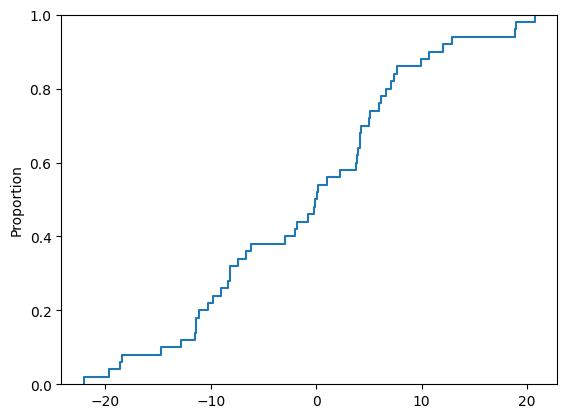

In [ ]:
sns.ecdfplot(data=variational_series2) # ECDF
None

In [ ]:

splits = [x for x in np.arange(-23.02, 26.03, 4)]
distributed_values = []
for i in range(1, len(splits) - 1):
    iclass = []
    for value in variational_series2:
        if splits[i-1] < value and value < splits[i]:
            iclass.append(value)
    distributed_values.append(iclass)


In [ ]:
len(splits), len([len(x) for x in distributed_values])

(13, 11)

In [ ]:
mid_points = []
for x in distributed_values:
    if x:
        mid_points.append((max(x) + min(x))/2)
    else:
        mid_points.append(0)

In [ ]:
print(distributed_values)

[[-22.03, -19.68], [-18.58, -18.4], [-14.67, -12.77, -11.47, -11.4, -11.37, -11.09], [-10.3, -9.8, -9.04, -8.36, -8.16, -8.13, -7.41], [-6.64, -6.13], [-2.92, -1.98, -1.78, -0.74, -0.19, -0.14, 0.12, 0.16], [1.02, 2.28, 3.74, 3.9, 4.01, 4.13, 4.13, 4.3], [5.0, 5.12, 5.98, 6.19, 6.62, 7.08, 7.36, 7.67], [9.97, 10.71, 12.04, 12.84], [], [18.88, 18.98, 20.73]]


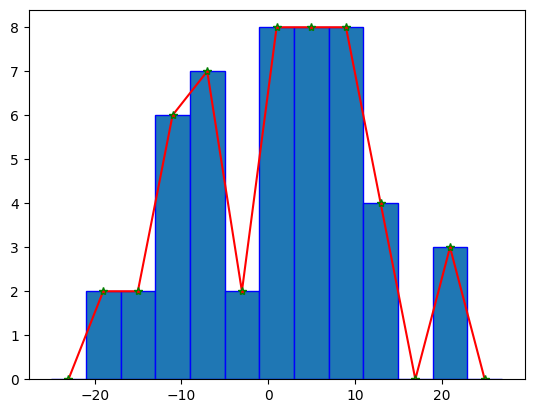

In [ ]:
plt.bar(splits, [0]+[len(x) for x in distributed_values]+[0], align='center', edgecolor='b', width=4)
plt.plot(splits, [0]+[len(x) for x in distributed_values]+[0], color="r", marker="*", markeredgecolor="g")
None

### b) Вычислить аналоги выборочных числовых характеристик

In [ ]:
print("Мат. ожидание: ", np.mean(dataset2))
print("СКО: ", np.std(dataset2) ** 2)
print("Дисперсия: ", np.std(dataset2) ** 2)
print("Медиана: ", np.median(dataset2))
print("Ассиметрия: ", stats.skew(dataset2))
print("Эксцесса: ", stats.kurtosis(dataset2))
sv = np.std(dataset2) ** 2
sm = np.mean(dataset2)

Мат. ожидание:  -1.0043999999999997
СКО:  102.88007264000002
Дисперсия:  102.88007264000002
Медиана:  -0.010000000000000009
Ассиметрия:  -0.013515056460204664
Эксцесса:  -0.5419568368832932


In [ ]:
# Эмпирическая вероятность
ECDF(dataset2, 3) - ECDF(dataset2, -11)

0.37999999999999995

### c) ОМП в предположении, что $X_i$ ~ $\mathcal{N}(a, \sigma^2)$

### ОМП для $\mu$ и $\sigma^2$, пусть а = $\mu$
### <center> $p(x) = {\displaystyle \frac{1}{\sigma \sqrt{2 \pi}}e^{{\displaystyle -\frac{1}{2}(\frac{x-\mu}{\sigma})^2}}}$

### <center>$L(\mu, \sigma ^{2};\overrightarrow{x})=(2\pi\sigma ^{2})^{-\frac{n}{2}}e^{-\frac{1}{2\sigma^2}\sum\limits^{n}_{i=1}(x_i - \mu)^2}$

### <center>$LL(\mu, \sigma ^{2};\overrightarrow{x})= -\frac{n}{2}log(2\pi)- \frac{n}{2} log(\sigma ^{2})-\frac{1}{2\sigma ^{2}}\sum\limits_{i=1}^{n}(x_{i}-\mu )^{2}$

### <center> $\frac{\partial LL}{\partial \mu} = \frac{1}{2\sigma ^{2}}\sum\limits_{i=1}^{n}((x_{i}-\mu )^{2})' = 0$
### <center> $\frac{1}{2\sigma ^{2}}\sum\limits_{i=1}^{n}-2(x_{i}-\mu ) = 0$
### <center> $\sum\limits_{i=1}^{n}(x_{i}-\mu ) = 0 $
### <center> ${\displaystyle \hat{\mu} = \frac{1}{n}\sum\limits_{i=1}^{n}} x_i$

### <center> $\frac{\partial LL}{\partial \sigma} = - \frac{n}{2} (log(\sigma ^{2}))'-(\frac{1}{2\sigma ^{2}})'\sum\limits_{i=1}^{n}(x_{i}-\mu )^{2} = 0 $
### <center> $ - \frac{n}{2} \frac{2}{\sigma}  + \frac{2}{2} \sigma^{-3} \sum\limits_{i=1}^{n}(x_{i}-\mu )^{2}$
### <center> $ -n\sigma^2 = -\sum\limits_{i=1}^{n}(x_{i}-\mu )^{2}$
### <center> ${\displaystyle \hat{\sigma}^2 = \frac{1}{n}\sum\limits_{i=1}^{n}(x_{i}-\bar{x} )^{2}}$

### Оценка через метод моментов для $\mu$ и $\sigma$
### <center> 2 параметра - 2 уравнения.

### <center> $M_1 = g_1 \Rightarrow \begin{cases} M_1 = E[X] = \mu \\ M_2 = E[(X - E[X])^2] = \sigma^2 \\ g_1 = \bar{X} \\ g_2 = {\displaystyle \frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2} \end{cases} \Rightarrow \begin{cases}\hat{\mu} = \bar{X} \\ \hat{\sigma}^2 = \frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2\end{cases}$

### Проверим на смещенность:
### <center> $E[\hat{\mu}] = E[\frac{\sum_{i=1}^{n}x_i}{n}] = \frac{1}{n}\sum_{i=1}^{n}E[x_i]= \frac{1}{n}\sum_{i=1}^{n} \mu =  \frac{n \mu}{n} = \mu$
### <center> $E[\hat{\sigma}^2] = E[\frac{1}{n}\sum\limits_{i=1}^{n}(x_{i}-\bar{x} )^{2}]= E[\frac{1}{n}\sum\limits_{i=1}^{n}(x_i^2 -2x_i\bar{x}+\bar{x}^2)] = E[\frac{1}{n}\sum\limits_{i=1}^{n}x^2_i -\frac{2}{n}\sum\limits_{i=1}^{n}x_i\bar{x}+\frac{1}{n}\sum\limits_{i=1}^{n}\bar{x}^2] = \\ =E[\frac{1}{n}\sum\limits_{i=1}^{n}x^2_i - 2\bar{x}^2 +\bar{x}^2] = E[\frac{1}{n}\sum\limits_{i=1}^{n}x^2_i - \bar{x}^2] = \frac{1}{n}\sum\limits_{i=1}^{n}E[x^2_i] - E[\bar{x}^2] = [\text{as } \sigma^2 = E[x^2] - \mu^2] = \\ = \frac{1}{n}\sum\limits_{i=1}^{n}(\sigma^2 + \mu^2) - E[\bar{x}^2] = [\text{as }  \frac{\sigma^2}{n} = E[\bar{x}^2] - \mu^2] = (\sigma^2 + \mu^2) - (\frac{\sigma^2}{n} + \mu^2) = \sigma^2 - \frac{\sigma^2}{n} = \frac{n-1}{n}\sigma^2$

### <center> $bias(\hat{\mu}, \mu) = 0$
### <center> $bias(\hat{\sigma}^2, \sigma^2) = -\frac{1}{n}\sigma^2$

### d) ДИ для параметров $\sigma^2$ и $\mu$ для $\alpha_2=0.1$

### В предположении, что все СВ являются выборкой из нормального



### <center>$  T = \frac {\bar X - \mu}{\frac{S}{\sqrt{n}}} \sim t_{n-1} $
### <center> $P\left(-t_{{1 -\frac{\alpha}{2}},n-1} \leq T \leq t_{{1 -\frac{\alpha}{2}},n-1} \right)= 1-\alpha$
### <center> $P\left(-t_{{1 -\frac{\alpha}{2}},n-1} \leq \frac{\overline{X}-\mu}{S / \sqrt{n}} \leq t_{{1 -\frac{\alpha}{2}},n-1} \right)= 1-\alpha$
### <center> $P\left(\overline{X}- t_{{1 -\frac{\alpha}{2}},n-1}\frac{S}{\sqrt{n}} \leq \mu \leq \overline{X}+ t_{{1 -\frac{\alpha}{2}},n-1} \frac{S}{\sqrt{n}} \right)= 1-\alpha$
### <center> $\left[\overline{X}- t_{{1 -\frac{\alpha}{2}},n-1}\frac{S}{\sqrt{n}} , \overline{X}+ t_{{1 -\frac{\alpha}{2}},n-1} \frac{S}{\sqrt{n}}\right]$

### <center> $\mu \in [-3.4093, 1.4005]$


In [ ]:
n = len(dataset2)
mulb = sm - (sv**0.5 * stats.t.ppf(0.95, df=49))/((n)**0.5)
murb = sm + (sv**0.5 * stats.t.ppf(0.95, df=49))/(n)**0.5
[mulb, murb]

[-3.409301924937398, 1.4005019249373982]

### <center> $Y=\frac{(n-1)S^2}{\sigma^2}=\frac{1}{\sigma^2}\sum_{i=1}^{n} (X_i-\overline{X})^2 \sim \chi^2_{n-1}$
### <center> $P\left(\chi^2_{1-\frac{\alpha}{2},n-1} \leq Y \leq \chi^2_{\frac{\alpha}{2},n-1} \right)= 1-\alpha$
### <center> $P\left(\chi^2_{1-\frac{\alpha}{2},n-1} \leq \frac{(n-1)S^2}{\sigma^2} \leq \chi^2_{\frac{\alpha}{2},n-1} \right)= 1-\alpha$
### <center> $P\left(\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2},n-1}} \leq \sigma^2 \leq \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2},n-1}} \right)= 1-\alpha$
### <center> $\left[\frac{(n-1)S^2}{\chi^2_{1-\frac{\alpha}{2},n-1}} , \frac{(n-1)S^2}{\chi^2_{\frac{\alpha}{2},n-1}} \right]$

### <center> $\sigma^2 \in [75.99 ,148.57]$

In [ ]:
stats.chi2.ppf(0.95, df=49)

66.3386488629688

In [ ]:
n = len(dataset2)
sigmalb =  (sv *(n-1))/ stats.chi2.ppf(0.95, df=49)
sigmarb = (sv *(n-1))/ stats.chi2.ppf(0.05, df=49)
[sigmalb, sigmarb]

[75.99074816511721, 148.57288985358466]

### e) Простая гипотеза Колмогорова для нормального с параметрами:
### $\mu_0 = 32;$
### $\sigma_0 = 10;$
### $\alpha_2 = 0.1$

### Критерий Колмогорова:

### $$D_n = sup_x|F_n(x)-F(x)|$$

### Основную гипотезу отклоняем, если: $\sqrt n D_n > K_\alpha$, где $K_\alpha$

### Квантиль уровня $1-\alpha$ распределения Колмогорова.
### $$  K_{\alpha_2} = 0.172 $$
### $$  D_n(X) = 0.912$$
### $$ \sqrt{n}D = 6.447 > 0.172  $$
### Вывод:  основную гипотезу стоит отклонить
### $$ p-value = 2.8014745924891474e-53 \approx 0 $$

In [ ]:
stats.kstest(rvs=dataset2, cdf=lambda x: stats.norm.cdf(x, loc=32, scale=10.0), N=50)

KstestResult(statistic=0.9123174521550068, pvalue=2.8014745924891474e-53, statistic_location=12.84, statistic_sign=1)

### f) Простая гипотеза $\chi^2$ для нормального с параметрами:
### $\mu_0 = 32;$
### $\sigma_0 = 10;$
### $\alpha_2 = 0.1$

### Разбиение Образа СВ:

### <center> $\Delta = (-\infty, -11.2) \cup [-11.02, -3.02) \cup [-3.02, 0.98) \cup [0.98, 4.98)\cup [4.98, 8.98) \cup [8.98, \infty)$

In [ ]:
intervals = [[["-inf", -11.02], 10],
            [[-11.02, -3.02], 9],
            [[-3.02, 0.98], 8],
            [[0.98, 4.98], 8],
            [[4.98, 8.98], 8],
            [[8.98, "inf"], 7]]
intervals

[[['-inf', -11.02], 10],
 [[-11.02, -3.02], 9],
 [[-3.02, 0.98], 8],
 [[0.98, 4.98], 8],
 [[4.98, 8.98], 8],
 [[8.98, 'inf'], 7]]

In [ ]:
empirical_values=[[["-inf", -11.02], 10/50],
            [[-11.02, -3.02], 9/50],
            [[-3.02, 0.98], 8/50],
            [[0.98, 4.98], 8/50],
            [[4.98, 8.98], 8/50],
            [[8.98, "inf"], 7/50]]
empirical_values

[[['-inf', -11.02], 0.2],
 [[-11.02, -3.02], 0.18],
 [[-3.02, 0.98], 0.16],
 [[0.98, 4.98], 0.16],
 [[4.98, 8.98], 0.16],
 [[8.98, 'inf'], 0.14]]

In [ ]:
theoretical_values = [[["-inf", -11.02]],
            [[-11.02, -3.02]],
            [[-3.02, 0.98]],
            [[0.98, 4.98]],
            [[4.98, 8.98]],
            [[8.98, "inf"]]]
for i in range(1, len(theoretical_values)-1):
    theoretical_values[i].append(stats.norm.cdf(theoretical_values[i][0][1], loc=32, scale=10) - stats.norm.cdf(theoretical_values[i][0][0], loc=32, scale=10))
theoretical_values[-1].append(1 - stats.norm.cdf(x=8.98, loc=32, scale=10))
theoretical_values[0].append(stats.norm.cdf(x=-11.02, loc=32, scale=10))
theoretical_values

[[['-inf', -11.02], 8.463165583267577e-06],
 [[-11.02, -3.02], 0.00022242664376960703],
 [[-3.02, 0.98], 0.0007301999825727414],
 [[0.98, 4.98], 0.0024850983272177345],
 [[4.98, 8.98], 0.007221397969491672],
 [[8.98, 'inf'], 0.989332413911365]]

In [ ]:
tmp = [(pow(empirical_values[i][1] - theoretical_values[i][1], 2))  / theoretical_values[i][1] for i in range(len(empirical_values))]
chi_squared = 50 * sum(tmp)
chi_squared, tmp

(245997.74955520284,
 [4725.963873904192,
  145.30622471349398,
  34.739619012609694,
  9.983888354536093,
  3.2322413661463782,
  0.7291437530774503])

### Основную гипотезу стоит отклонить

### Из таблички наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу:
### <center>  $p-value = 0$


### g) Сложная гипотеза $\chi^2$ для нормального с параметрами:
### $\alpha_2 = 0.1$

In [ ]:
def chi24expon(params):
    theoretical_values = [[["-inf", -11.02]],
            [[-11.02, -3.02]],
            [[-3.02, 0.98]],
            [[0.98, 4.98]],
            [[4.98, 8.98]],
            [[8.98, "inf"]]]
    for i in range(1, len(theoretical_values)-1):
        theoretical_values[i].append(stats.norm.cdf(theoretical_values[i][0][1], loc=params[0], scale=params[1]) - stats.norm.cdf(theoretical_values[i][0][0], loc=params[0], scale=params[1]))
    theoretical_values[-1].append(1 - stats.norm.cdf(x=8.98, loc=params[0], scale=params[1]))
    theoretical_values[0].append(stats.norm.cdf(x=-11.02, loc=params[0], scale=params[1]))


    obs = [10, 9, 8, 8, 8, 7]
    n = 50
    chi2 = 0
    for i in range(len(theoretical_values)):
        chi2 += (obs[i] - n * theoretical_values[i][1])**2/(n*theoretical_values[i][1])
    return chi2

In [ ]:
opt.minimize(x0=(0, 10), fun=chi24expon,  bounds=[(None, None), (0, None)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 2.7224052194688584
        x: [-1.072e+00  1.047e+01]
      nit: 5
      jac: [ 4.796e-06  3.642e-06]
     nfev: 18
     njev: 6
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### Число степеней свободы: 6 - 2 - 1 = 3
### <center> $\chi^2_{est} \approx 2.72 < \chi^2_{crit}= 6.215$
### <center> Основную гипотезу принимаем

### <center> p-value = 0.4368

### h) РНМ Критерий для нормального


### $\alpha_2 = 0.1$
### $\mu_0 = 32$
### $\mu_1 = -1$
### $\sigma = \sigma_0 = \sigma_1 = 10$


### $\theta  = (\mu, \sigma)$


### <center> $L(X, \theta) = (\frac{1}{\sqrt{2\pi}\sigma})^nexp(-\frac{1}{2\sigma^2}\sum\limits_{i=1}^n(X_i - \mu)^2)$

### <center> $\frac{L(X, \theta_1)}{L(X, \theta_0)} = exp(-\frac{1}{2\sigma^2}\sum\limits_{i=1}^n((X_i - \mu_1)^2 - (X_i - \mu_0)^2)) \ge D'$

### <center> $\frac{L(X, \theta_1)}{L(X, \theta_0)} = exp(-\frac{1}{2\sigma^2}\sum\limits_{i=1}^n((X_i - \mu_1)^2 - (X_i - \mu_0)^2)) \ge D'$

### <center> $ (\mu_1 - \mu_0) \sum\limits_{i=0}^n (X_i - \frac{\mu_0 + \mu_1}{2}) \ge D''$

### <center> $ \bar{X} \le D$ (при $\mu_1 = -1, \mu_0 = 32$)
### <center> $ \bar{X} \ge D$ (при $\mu_1 = 32, \mu_0 = -1$)



### Аналогично заданию 1 нужно преобразоввать выражение, чтобы перейти к квантилям стандартного распределения, только теперь вычисления буду точными, т.к. находимся в нормальном распределении.

In [ ]:
dataset2.mean()

-1.0043999999999997

### При $$\mu_1 = -1, \mu_0 = 32$$

In [ ]:
D = -1 + (dataset2.std())/7.07 * stats.norm.ppf(0.1)
D

-2.838579031550208

### Основную гипотезу стоит отвергнуть

### При $$\mu_1 = 32, \mu_0 = -1$$

In [ ]:
D = -3 - (dataset2.std())/7.07 * stats.norm.ppf(0.1)
D

-1.1614209684497923

### Основную гипотезу стоит принять

### i[c]) ОМП в предположении, что $X_i$ ~ ${Laplace}(\mu, b)$

### $\mu = a, b=\frac{\sigma}{\sqrt{2}}$
### <center> $p(x) = \frac{1}{2b}e^{(-\frac{|x-\mu|}{b})}$
### <center> $L(\mu,b;\overrightarrow{x})=\prod\limits_{i=1}^{n}\frac{1}{2b}e^{(-\frac{|x_i-\mu|}{b})} = ({\frac{1}{2b}})^ne^{-\frac{1}{b}\sum\limits_{i=1}^{n}({|x_i-\mu|})}$
### <center> $LL(\mu,b;\overrightarrow{x}) = -nlog(2b)-\frac{1}{b}\sum\limits_{i=1}^{n}({|x_i-\mu|})$
### <center> [H.M.] $\frac{\partial |x|}{\partial x} = \frac{\partial \sqrt{x^2}}{\partial x} = \frac{\partial (x^2)^{\frac{1}{2}}}{\partial x} = x(x^2)^{-\frac{1}{2}}= \frac{x}{\sqrt{x^2}} = \frac{x}{|x|} = sign(x)$
### <center> $\frac{\partial LL}{\partial \mu} = \frac{1}{b}\sum\limits^n_{i=1}sign(x_i - \mu)=0$
### <center> Если выбрать как оценку ${\mu}$ медиану, то в том случае, когда наблюдений нечетное количество. она будет удовлетворять уравнению выше (т.к. $\frac{N-1}{2}$ наблюдений > медианы и $\frac{N-1}{2}$ < медианы -> сумма обратится в 0), если их четное количество, то уравнение выше в общем случае решить нельзя, но все еще можем минимизировать его, опять-таки, взяв медиану, как оценку $\mu$.
### <center> $\hat{\mu} = median(x) = x_{0.5}$
### <center> $\frac{\partial LL}{\partial b} = -\frac{n}{b} +\frac{1}{b^2}\sum\limits_{i=1}^{n}({|x_i-\mu|}) = 0$
### <center> $ \hat{b} = \frac{1}{n}\sum\limits_{i=1}^{n}({|x_i-\mu|)}$
Или $\sigma$
### <center> $$ \hat{\sigma}^2 = \frac{2}{n^2}(\sum\limits_{i=1}^{n}{|x_i-\mu|})^2$$


### Оценки для $\mu$ и $b$ по методу моментов

### <center> 2 параметра - 2 уравнения.

### <center> $M_1 = g_1 \Rightarrow \begin{cases} M_1 = E[X] = \mu \\ M_2 = E[(X - E[X])^2] = 2b^2 \\ g_1 = \bar{X} \\ g_2 = {\displaystyle \frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2} \end{cases} \Rightarrow \\  \Rightarrow \begin{cases}\hat{\mu} = \bar{X} \\ \hat{b} = \sqrt{(\frac{1}{2n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2)}\end{cases} \text{ or } \begin{cases}\hat{\mu} = \bar{X} \\ \hat{\sigma}^2 = {(\frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2)}\end{cases}$

### Вычисление смещения

### $E[\hat{\mu}_{MLE}] = E[x_{0.5}] = x_{0.5} \Rightarrow bias(\hat{\mu}_{MLE}, \mu) =  x_{0.5} - \mu$

### $E[\hat{\mu}_{MM}] = E[\bar{X}] = E[\frac{1}{n}\sum\limits_{i=1}^{n}X_i] = \frac{1}{n}\sum\limits_{i=1}^{n}E[X_i] = \frac{n}{n}\mu = \mu = a \Rightarrow bias(\hat{\mu}_{MM}, \mu)$

### $E[\hat{\sigma}_{MM}^2] = E[ {(\frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2)}] = (\frac{1}{n}\sum\limits_{i=1}^{n}E[(X_i - \mu )^2] = Var[X_i] = \sigma^2 \Rightarrow bias(\hat{\sigma}_{MM}^2, \sigma^2) = 0$







### $X_n = \{1, ..., n\}$ - не пустое, конечное множество
### $\hat{X}_{n} = \{x_i, x_j \in X_n|x_i < x_j\}$
### <center> $\hat{X}_{n+1} = \hat{X}_{n} \cup K_{n+1}: \hat{X}_{n} \cap K_{n+1} = \emptyset$ \{не пересекающиеся\}
### <center> следствие: $|X_{n+1}|-|X_n|=|K_{n+1}|$
### <center> важно заметить: $X_n \subset X_{n+1}$

### <center> Мое утверждение : $|\hat{X}_{n}| = C^2_n, n > 1$
### Док-во по мат. индукции n = 2:
### <center> $|\hat{X}_2| = C_2^2$
### <center> $|\{\{1,2\}\}| = 1$
### <center> $1 = 1$
###  n = k:
### <center> $|\hat{X}_k| = C_k^2$
###  n = k + 1:
### <center> $|\hat{X}_{k+1}| = C_{k+1}^2$
### <center> $|\hat{X}_{k} \cup K_{k+1}| = C_{k+1}^2$
### <center> $|\hat{X}_{k}| + |K_{k+1}| = C_{k+1}^2 \text{ }$ [$\hat{X}_{k} \cap K_{k+1} = \emptyset$ ]
### <center> $C_{k}^2 + |K_{k+1}| = C_{k+1}^2$
### <center> $|K_{k+1}| =  \frac{(k+1)!}{2!(k-1)!} -  \frac{k!}{2!(k-2)!}$
### <center> $|K_{k+1}| =  \frac{k(k+1)}{2} -  \frac{k(k-1)}{2}$
### <center> $|K_{k+1}| =  \frac{2k}{2}$
### <center> $|K_{k+1}| =  k$
### <center> $Q.E.D.$


### $E[\hat{\sigma}_{MLE}^2] = E[\frac{2}{n^2}(\sum\limits_{i=1}^{n}{|X_i-\mu|)^2}] = \frac{2}{n^2}E[(\sum\limits_{i=1}^{n}\sqrt{(X_i - \mu)^2})^2] = \\ = \frac{2}{n^2}E[\sum\limits_{i=1}^{n}(\sqrt{(X_i - \mu)^2})^2 + 2\sum\limits {i<j}(\sqrt{(X_i - \mu)^2} \cdot \sqrt{(X_j - \mu)^2})]  =\\ = \frac{2}{n^2}(\sum\limits_{i=1}^{n}E[{(X_i - \mu)^2}] + 2\sum\limits_{i<j}E[\sqrt{(X_i - \mu)^2} \cdot \sqrt{(X_j - \mu)^2}]) = \{ I.I.D\} = \\ = \frac{2}{n^2}(\sum\limits_{i=1}^{n}E[{(X_i - \mu)^2}] + 2\sum\limits_{i<j}(E[\sqrt{(X_i - \mu)^2}] \cdot E[\sqrt{(X_j - \mu)^2}])) = \\ = \frac{2}{n^2}(\sum\limits_{i=1}^{n}E[{(X_i - \mu)^2}] + 2\sum\limits_{i<j}(\sqrt{E[(X_i - \mu)^2]} \cdot \sqrt{E[(X_j - \mu)^2]})) = \\ = \frac{2}{n^2}(\sum\limits_{i=1}^{n}Var[X_i] + 2\sum\limits_{i<j}(\sqrt{Var[X_i]} \cdot \sqrt{Var[X_j]})) = \{ I.I.D\} = \\ = \frac{2}{n^2}(\sum\limits_{i=1}^{n}Var[X_i] + 2\sum\limits_{i<j}{Var[X_i]}) = \{Var[X_i] \sim Laplace(\mu, b) = 2b^2 = \sigma^2\} = \\ = \frac{2}{n^2}(\sum\limits_{i=1}^{n}\sigma^2+ 2\sum\limits_{i<j}{\sigma^2}) = \text{Доказано выше} =\frac{2}{n}\sigma^2+ \frac{4}{n^2}C^2_n{\sigma^2} = \frac{2}{n}\sigma^2+ \frac{2}{n}(n-1){\sigma^2} = 2\sigma^2$





### <center> $bias(\hat{\sigma}_{MLE}^2, \sigma^2) = 2\sigma^2-\sigma^2=\sigma^2$

### $E[\hat{\sigma}_{MM}^2] = E[ {(\frac{1}{n}\sum\limits_{i=1}^{n}(X_i - \bar{X}) ^2)}] = (\frac{1}{n}\sum\limits_{i=1}^{n}E[(X_i - \mu )^2] = \{H.M.\} = Var[X_i] = \sigma^2$

### i[e]) простая гипотеза Колмогорова для лапласа с параметрами:
### $\mu_0 = 32;$
### $\sigma_0 = 10;$
### $\alpha_2 = 0.1$

### Критерий Колмогорова:

### $$D_n = sup_x|F_n(x)-F(x)|$$

### Основную гипотезу отклоняем, если: $\sqrt n D_n > K_\alpha$, где $K_\alpha$

### Квантиль уровня $1-\alpha$ распределения Колмогорова.
### $$  K_{\alpha_2} = 0.172 $$
### $$  D_n(X) = 0.906$$
### $$ \sqrt{n}D = 6.405 > 0.172  $$
### Вывод:  основную гипотезу стоит отклонить
### $$ p-value = 6.196431849369758e-52 \approx 0 $$

In [ ]:
stats.kstest(rvs=dataset2, cdf=lambda x: stats.laplace.cdf(x, loc=32, scale=10.0/np.sqrt(2)), N=50)

KstestResult(statistic=0.9067193910715228, pvalue=6.196431849369758e-52, statistic_location=12.84, statistic_sign=1)

### i[f]) Простая гипотеза $\chi^2$ для лапласа с параметрами:
### $\mu_0 = 32;$
### $\sigma^2_0 = 10;$
### $\alpha_2 = 0.1$

### Разбиение и вычисления - аналогичны

In [ ]:
theoretical_values = [[["-inf", -11.02]],
            [[-11.02, -3.02]],
            [[-3.02, 0.98]],
            [[0.98, 4.98]],
            [[4.98, 8.98]],
            [[8.98, "inf"]]]
for i in range(1, len(theoretical_values)-1):
    theoretical_values[i].append(stats.laplace.cdf(theoretical_values[i][0][1], loc=32, scale=10) - stats.laplace.cdf(theoretical_values[i][0][0], loc=32, scale=10))
theoretical_values[-1].append(1 - stats.laplace.cdf(x=8.98, loc=32, scale=10))
theoretical_values[0].append(stats.laplace.cdf(x=-11.02, loc=32, scale=10))
theoretical_values

[[['-inf', -11.02], 0.006770724506606095],
 [[-11.02, -3.02], 0.008297799998392728],
 [[-3.02, 0.98], 0.007411072508571127],
 [[0.98, 4.98], 0.011056021004296642],
 [[4.98, 8.98], 0.01649364519185037],
 [[8.98, 'inf'], 0.949970736790283]]

In [ ]:
tmp = [(pow(empirical_values[i][1] - theoretical_values[i][1], 2))  / theoretical_values[i][1] for i in range(len(empirical_values))]
chi_squared = 50 * sum(tmp)
chi_squared, tmp

(807.7476548513418,
 [5.5145579872984385,
  3.5529472259035524,
  3.1417019285746584,
  2.006536426663006,
  1.2486065773076174,
  0.6906029512795666])

### Основную гипотезу стоит отвергнуть

### Из таблички наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу:
### <center>  $p-value =$ 0

### i[g]) Сложная гипотеза $\chi^2$ для лапласа с параметрами:
### $\alpha_2 = 0.02$

In [ ]:
def chi24laplace(params):
    theoretical_values = [[["-inf", -11.02]],
            [[-11.02, -3.02]],
            [[-3.02, 0.98]],
            [[0.98, 4.98]],
            [[4.98, 8.98]],
            [[8.98, "inf"]]]
    for i in range(1, len(theoretical_values)-1):
        theoretical_values[i].append(stats.laplace.cdf(theoretical_values[i][0][1], loc=params[0], scale=params[1]) - stats.laplace.cdf(theoretical_values[i][0][0], loc=params[0], scale=params[1]))
    theoretical_values[-1].append(1 - stats.laplace.cdf(x=-2, loc=params[0], scale=params[1]))
    theoretical_values[0].append(stats.laplace.cdf(x=-3.8, loc=params[0], scale=params[1]))

    obs = [10, 9, 8, 8, 8, 7]
    n = 50
    chi2 = 0
    for i in range(len(theoretical_values)):
        chi2 += (obs[i] - n * theoretical_values[i][1])**2/(n*theoretical_values[i][1])
    return chi2

In [ ]:
opt.minimize(x0=[-3, 0.5], fun=chi24laplace, bounds=[(None, None),(0, None)])

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: 22.033716574923137
        x: [ 6.191e-01  9.684e+00]
      nit: 20
      jac: [ 2.842e-06  1.066e-06]
     nfev: 84
     njev: 28
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>

### <center> $\chi^2_{est} \approx 22.03 < \chi^2_{crit}= 6.251$
### <center> Основную гипотезу отклоняем

### <center> p-value = 0

## Выводы

### В ходе практической работы было изучено и реализовано применение методов математической статистики для решения задач статистического анализа, сформировались навыки реализации методов с помощью прикладных программных пакетов. Были изучены основные методы и приобретены навыки проведения статистических тестов, анализа выборочных данных, построения доверительных интервалов, проверки гипотез и т.д. Были построены оценки и асимптотические интервалы, проверены и доказаны гипотезы.